<a href="https://colab.research.google.com/github/simsia99/keras_deeplearning/blob/main/deep2-2%20correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [10]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype("float32")/255

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 14s 26ms/step - loss: 0.2629 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1063 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0700 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0502 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9887


In [12]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 83ms/step


array([1.02429595e-07, 2.96403826e-08, 8.86453472e-06, 1.00765588e-04,
       1.47104134e-11, 9.19439547e-09, 2.64690752e-11, 9.99884903e-01,
       1.38732688e-07, 5.18652996e-06], dtype=float32)

In [13]:
predictions[0].argmax()
predictions[0][7]
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9792
테스트 정확도: 0.979200005531311


In [15]:
import numpy as np
x=np.array(12)
x

array(12)

In [16]:
x.ndim

0

In [17]:
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [18]:
x.ndim

1

In [19]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
x.ndim

2

**2.2.4   랭크-3 텐서와 더 높은 랭크의 텐서**

In [20]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
            [[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
            [[5,78,2,34,0],
             [6,78,2,34,1],
             [7,80,4,36,2]]])
x.ndim

3

**2.2.5 핵심속성**

In [21]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [22]:
train_images.ndim

3

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
train_images.dtype

dtype('uint8')

↑8비트 정수형 랭크-3 텐서
28x28 크기의 정수 행렬 6만개가 있는 배열
행렬의 각 원소는 0에서 255사이의 값

↓랭크-3텐서에서 다섯번째 샘플을 맷플롯립 라이브러리를 사용한다.

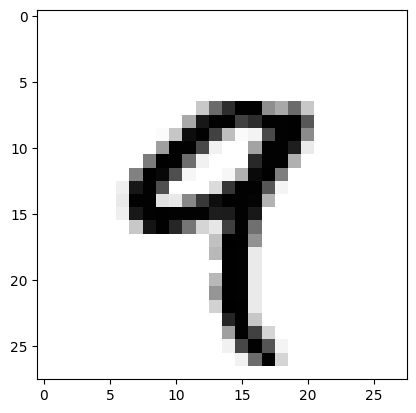

In [25]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
train_labels[4]

9

**2.2.6 넘파이로 텐서 조작하기**

11번째에서 101번째까지 숫자를 선택하여 (90,28,28)크기의 배열 만들기

In [27]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

각 배열의 축을 따라 슬랑ㅣ싱의 시작 인덱스와 마지막 인덱스를 지정

In [28]:
my_slice=train_images[10:100, : , :]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice=train_images[10:100, 0:20, 0:28]
my_slice.shape

(90, 20, 28)

In [30]:
my_slice = train_images

이미지의 오른쪽 아래 14x14 픽셀을 선택

In [31]:
my_slice = train_images[:, 14:,14:]

음수 인덱스 사용
현대 축의 끝에서 상대적 위치 나타냄
14x14 픽셀 조각을 이미지에서 잘라냄

In [32]:
my_slice = train_images[:, 7:-7, 7:-7]

**2.2.7 배치데이터**

In [33]:
batch = train_images[:128]

In [34]:
batch = train_images[128:256]

In [35]:
n=3
batch=train_images[128*n:128*(n+1)]